In [4]:
from matplotlib import pyplot as plt
from parse_logs import parse_siege_logs, read_log_file

In [11]:
log_file_path = './logs-paas/siege-r5.log'
log_data = read_log_file(log_file_path)
results_r1 = parse_siege_logs(log_data)

In [18]:
# note that siege caps concurrent users at 255
log_file_path = './logs-paas/siege-r5.log'
log_data = read_log_file(log_file_path)
results_r5 = parse_siege_logs(log_data)

In [19]:
results_r5[-1]

{'timestamp': '2025-01-24 14:15:31',
 'c': 400,
 'd': 1,
 'r': 5,
 'transactions': 3825,
 'elapsed_time': 133.32,
 'data_transferred': 7.0,
 'response_time': 7.98,
 'transaction_rate': 28.69,
 'throughput': 0.05,
 'concurrency': 228.98,
 'successful_transactions': 3825,
 'failed_transactions': 0}

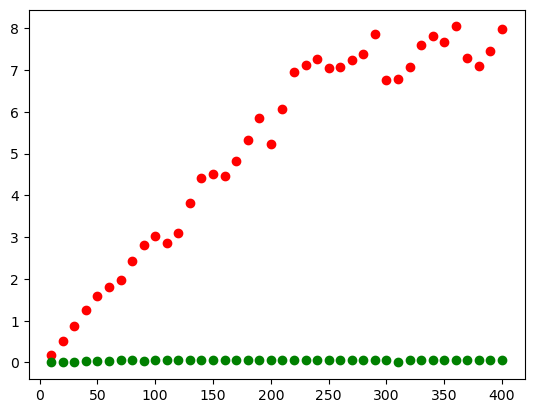

In [20]:
# plot results' response time, throughput against c
for res in results_r5:
    plt.plot(res['c'], res['response_time'], 'ro')
    # plt.plot(res['c'], res['transaction_rate'], 'bo')
    plt.plot(res['c'], res['throughput'], 'go')


# plt.plot(results['time'], results['response_time'], label='response time')

In [21]:
# Transactions:                3000    hits
# Availability:                 100.00 %
# Elapsed time:                  88.01 secs
# Data transferred:               6.15 MB
# Response time:               5223.67 ms
# Transaction rate:              34.09 trans/sec
# Throughput:                     0.07 MB/sec
# Concurrency:                  178.06
# Successful transactions:     3000
# Failed transactions:            0
# Longest transaction:        19260.00 ms
# Shortest transaction:           0.00 ms
#
# 2025-01-24 12:50:16,   
# 3000,      
# 88.01,           
# data transferred 6,       
# response time (s) 5.22,
# trans rate       34.09,        
# throughput 0.07,      
# concurrency 178.06,    
# success 3000,       
# failed 0

In [ ]:
# plot response time
